In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 12

In [2]:
nAir = 1.0
nGlass = 1.5 # Not really, but doesn't actually matter

# Fake cuvette size, just reasonable choices
d1 = 1e-1 # Width of cuvette wall [mm]
d2 = 1 # Width of cuvette cavity [mm]

def delta(theta, dtheta=0, d1=d1, d2=d2, n0=nAir, n1=nGlass, n2=nAir):
    return (2*d1*(1 - n0 * np.cos(theta+dtheta)/np.sqrt(n1**2 - n0**2 * np.sin(theta+dtheta)**2)) + d2*(1 - n0*np.cos(theta+dtheta)/np.sqrt(n2**2 - n0**2 * np.sin(theta+dtheta)**2))) * np.sin(theta+dtheta)

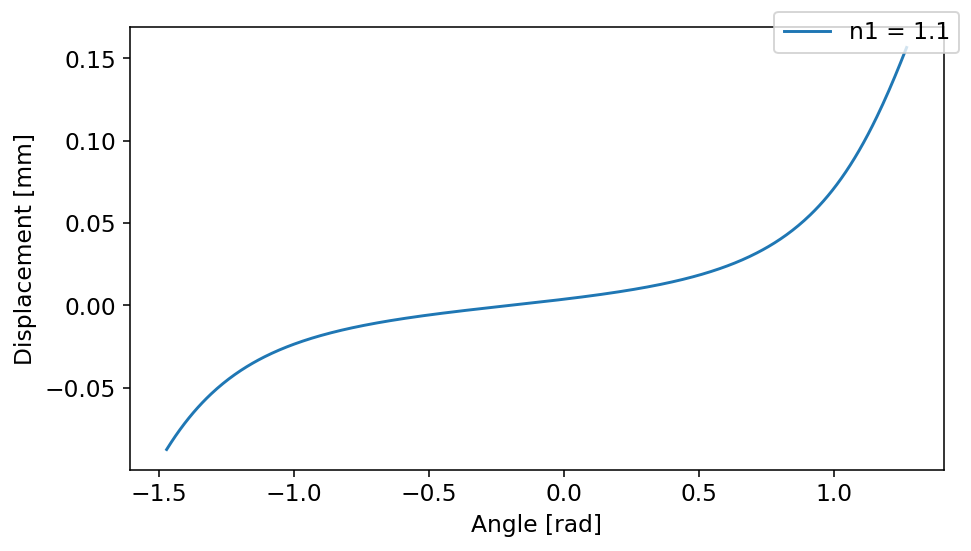

In [5]:
thetaArr = np.linspace(-np.pi/2 + .1, np.pi/2 - .3, 500)
nGlassArr = np.linspace(1.1, 2, 1)
fig, ax = plt.subplots(figsize=(7, 4))

for n in nGlassArr:
    deltaArr = [delta(th, n1=n, dtheta=.2) for th in thetaArr]
    ax.plot(thetaArr, deltaArr, label=f'n1 = {n:.3}')
    
ax.set_xlabel("Angle [rad]")
ax.set_ylabel("Displacement [mm]")
fig.legend()
fig.tight_layout()
plt.savefig('expected_displacement_curve.png')
plt.show()

Real phase difference: -0.5
Calculated phase difference -0.5007270168624697


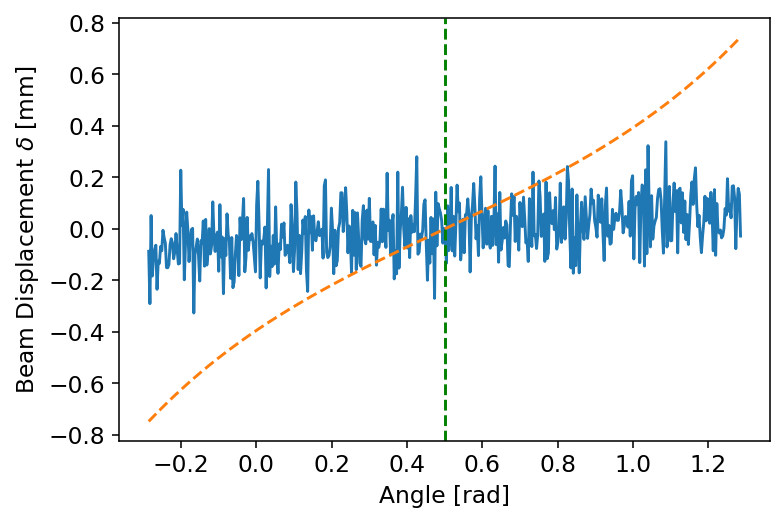

In [5]:
# Now recover the phase difference, just to confirm it can be done
phaseDiff = -.5 # Radians
thetaArr = np.linspace(-phaseDiff - np.pi/4, -phaseDiff + np.pi/4, 500)

rng = np.random.default_rng()
y_noise = 0.1 * rng.normal(size=thetaArr.size)

# What we would theoretically measure from the beam profiler
deltaArr = [delta(th, dtheta=phaseDiff) for th in thetaArr]

# Now fit our function with scipy
def wrap_func(th, phaseDiff):
    return delta(th, dtheta=phaseDiff, d1=1.5 ,d2=8, n1=1.3)

deltaArr = deltaArr + y_noise
popt, pcov = curve_fit(wrap_func, thetaArr, deltaArr, bounds=(-np.pi/2 + .01, np.pi/2 + .01))

plt.plot(thetaArr, deltaArr)
plt.plot(thetaArr, wrap_func(thetaArr, *popt), '--')
plt.axvline(-popt, linestyle='--', color='g')
plt.xlabel('Angle [rad]')
plt.ylabel(r'Beam Displacement $\delta$ [mm]')

print(f'Real phase difference: {phaseDiff}')
print(f'Calculated phase difference {popt[0]}')

plt.show()